<a href="https://colab.research.google.com/github/andi1356/applications/blob/GeometricFigure/NNTrain_GeometricFigure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import pickle
import shutil
import matplotlib.pyplot as plt
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
import os
from google.colab import drive
drive.mount(r'/content/drive')
os.chdir(f'drive/MyDrive/Colab Notebooks/Triangles')
base_dir = os.getcwd()
print(base_dir)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Triangles


In [ ]:
classes = ['empty_polygon', 'empty_triangle', 'hole_polygon', 'hole_triangle',
           'full_polygon', 'full_triangle']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

IMG_SHAPE = 224 
batch_size = 32




In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    vertical_flip=True
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 6038 images belonging to 6 classes.


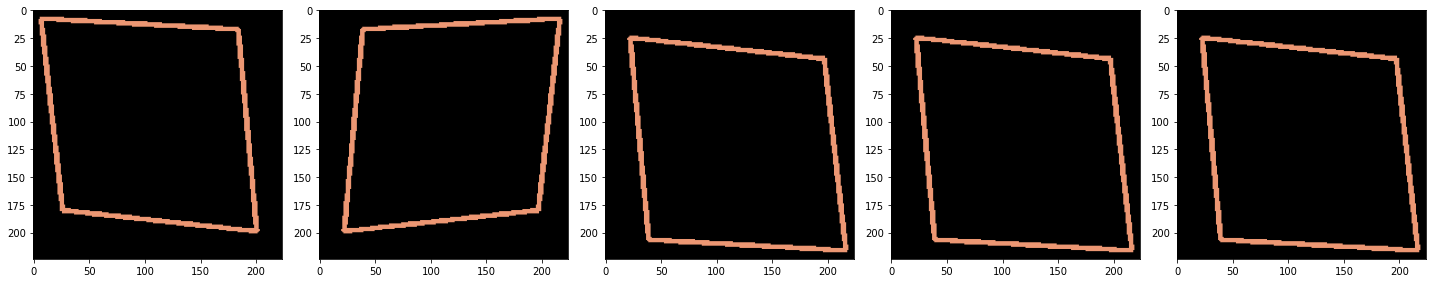

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2400 images belonging to 6 classes.


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
num_classes = 6
num_training_examples = 6038
num_validation_examples = 2400


In [ ]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMG_SHAPE, IMG_SHAPE, 3))
feature_extractor.trainable = False

In [ ]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 6

history = model.fit(train_data_gen,
                    epochs=EPOCHS,
                    validation_data=val_data_gen)

Epoch 1/6
189/189 [==============================] - 3012s 16s/step - loss: 0.1514 - accuracy: 0.9695 - val_loss: 0.0501 - val_accuracy: 0.9954
Epoch 2/6
189/189 [==============================] - 55s 291ms/step - loss: 0.0151 - accuracy: 0.9993 - val_loss: 0.0273 - val_accuracy: 0.9971
Epoch 3/6
189/189 [==============================] - 55s 292ms/step - loss: 0.0079 - accuracy: 0.9997 - val_loss: 0.0200 - val_accuracy: 0.9983
Epoch 4/6
189/189 [==============================] - 54s 286ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.0165 - val_accuracy: 0.9987
Epoch 5/6
189/189 [==============================] - 54s 286ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0122 - val_accuracy: 0.9987
Epoch 6/6
189/189 [==============================] - 54s 285ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 0.9987
